In [138]:
%matplotlib inline
# Sistema Massa-mola

In [139]:
import numpy as np
#import scipy
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt

## Ajuste Gaussiana

In [140]:
data=np.loadtxt('files/periodo.csv', delimiter=',', skiprows=1)
pexp=data[:,0]
hexp=data[:,1]/np.sum(hist[:,1]) # dados normalizados
Npontos=100

In [147]:
p = np.linspace(pexp[0], pexp[-1], num=Npontos) # np.arange(pexp[0], 3.403, 0.0001)

In [149]:
def Dn(x,a,b,c):
    return a*c*norm.pdf(x,b,c)      # The size or shape of your array
#    return a/c/np.sqrt(2*np.pi)*norm.pdf(x,b,c)      # The size or shape of your array

q=Dn(p,35, 3.41, 0.001)

### Ajuste Manual

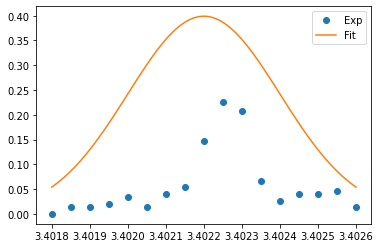

In [150]:
amp=1.
mn=3.4022
sg=0.0002
plt.plot(pexp, hexp, 'o', label='Exp')
plt.plot(p, Dn(p,amp,mn,sg), label='Fit')
#plt.plot(p, Dn(p,35, 3.041, 0.001), label='Fit')
plt.legend()
plt.show()

# Fit automático
$FWHM = 2 \sqrt{2 \ln(2)}\,\, \sigma$

In [151]:
from scipy.optimize import curve_fit
#       amp, mean, sigma
guess = [1, 3.4022, 0.0002]

popt, pcov = curve_fit(Dn, pexp, hexp, p0=guess)
#The optimised parameters of the fit
print("popt: amp=%g, mean=%g, std=%g" %(popt[0], popt[1], popt[2]))
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print("Erro dos parametros (perr):", perr)
# The covariance matrix of the parameters
# print("pcov:", pcov)
print("FWHM= %g s" %(2*np.sqrt(2*np.log(2))*popt[2]))

popt: amp=0.580802, mean=3.40226, std=6.51108e-05
Erro dos parametros (perr): [5.08955383e-02 6.58903787e-06 6.58897207e-06]
FWHM= 0.000153324 s


In [152]:
# Grafico Ajuste

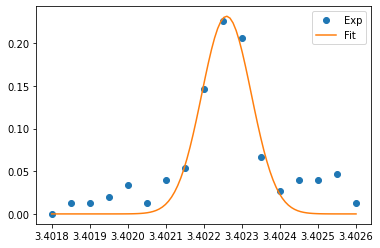

In [153]:
plt.plot(pexp, hexp, 'o', label='Exp')
plt.plot(p, Dn(p,*popt), label='Fit')
plt.legend()
plt.show()